In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [102]:
import torch
import segmentation_models_pytorch as smp
from model.Train import Trainer
from torch.utils.data import DataLoader, random_split
from utils.DataManager import DataManager as DM

## Params

In [103]:
epochs = 10
image_size = 128
num_classes = 1
batch_size = 8
learning_rate = 1e-4
train_ratio = 0.8
val_ratio = 0.2

In [104]:
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
path_sim_rol_extracted_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed" 
path_filtered = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed/json_filtered"
path_targets = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_sim_rol_triplets/targets.npy"

## Data loading / building

In [105]:
dataset = DM(path_rol_comp, path_sim_rol_extracted_comp, path_filtered, shape=(image_size, image_size), target_path=path_targets)

train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size

train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)

[INFO] Loaded exsisting targets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


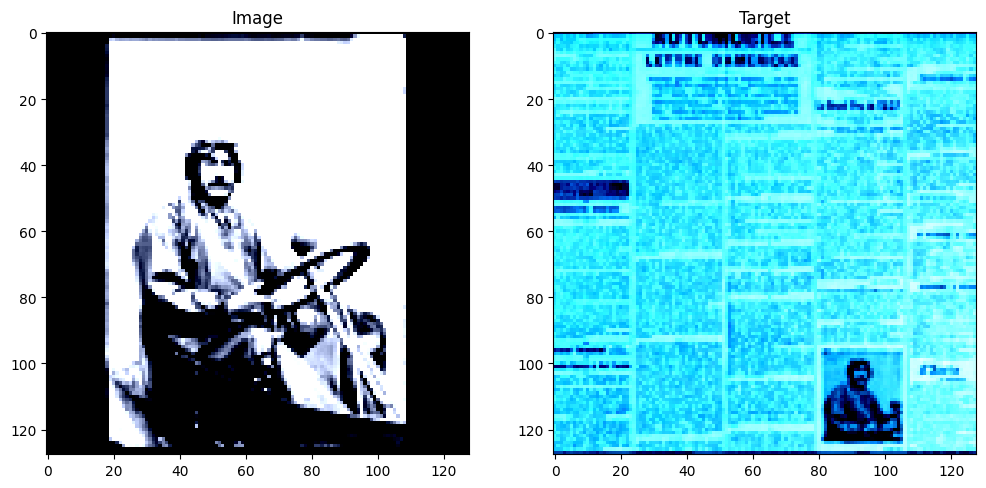

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


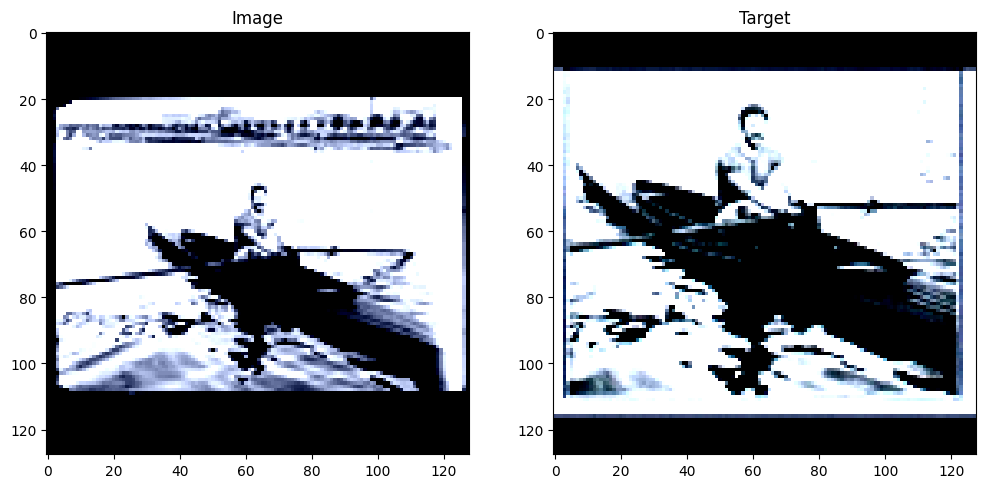

In [106]:
DM.show_data(train_loader)
DM.show_data(val_loader)

## Model Creation

In [107]:
encoder_name = 'efficientnet-b1'
model = smp.Unet(encoder_name=encoder_name, encoder_weights='imagenet', classes=num_classes, in_channels=3)
optimizer = torch.optim.AdamW
loss_fn = torch.nn.MSELoss()

## Model Training

In [108]:
trainer = Trainer()
trainer.set_model(model, encoder_name) \
.set_optimizer(optimizer) \
.set_loss(loss_fn) 

model = trainer.fit(train_data=train_loader, validation_data=val_loader, learning_rate=learning_rate, verbose=True, epochs=1)

[INFO] Model's device is : cuda


  0%|          | 0/1 [00:00<?, ?it/s]

Training...


c:\Users\halim\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([8, 3, 128, 128])) that is different to the input size (torch.Size([8, 1, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 192/192 [03:17<00:00,  1.03s/it]


Validating...


100%|██████████| 1/1 [03:34<00:00, 214.63s/it]

Epoch : 0, Train loss : 2.160627850641807, Validation loss : 2.0962030390898385


In [116]:
trainer.save()

In [120]:
import cv2

img = cv2.imread(path_rol_comp+'/'+'btv1b6904686p.jpg')

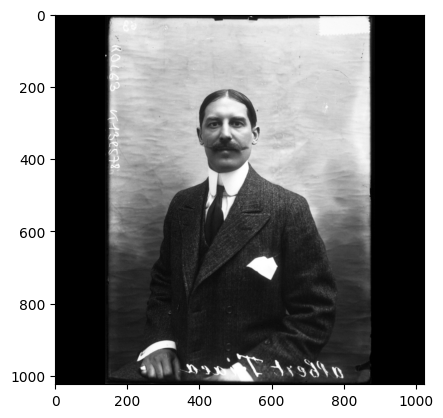

In [121]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [142]:
from PIL import Image

img = Image.open(path_rol_comp+'/'+'btv1b6904686p.jpg').convert('RGB')
img = dataset.transform(img)
img = img.view(-1, img.shape[0], img.shape[1], img.shape[2])
img = img.to(trainer.device)
pred = trainer.model(img)
plt.imshow(pred[0].detach().cpu().permute(1,2,0))